In [1]:
import numpy as np 
import math 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn 


from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Données

In [2]:
data = pd.read_csv('data/Salary_dataset.csv')

In [3]:
data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [4]:
data.drop(columns=['Unnamed: 0'], inplace = True)
X = data['YearsExperience']
Y = data ['Salary']

In [5]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Model

$\LARGE y = a x + b$

In [6]:
def set_line(a,b,start, end , num_point, color):
    x = np.linspace(start,end,num_point)
    y = [ a * elem + b for elem in x ] 
    plt.plot(x,y, color=color)
    return None

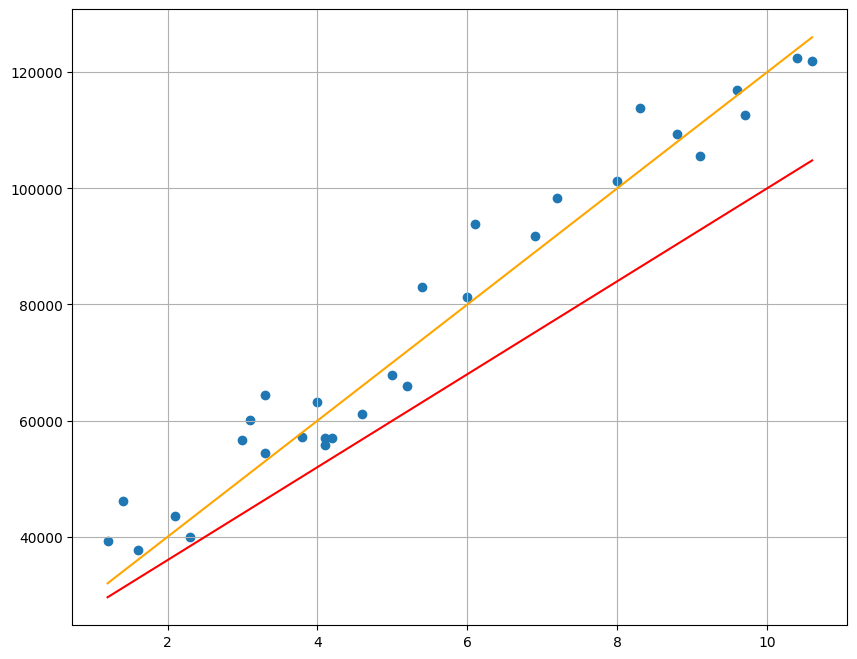

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(x = X , y = Y)
set_line(8000,20000, X.min(),X.max(), len(X), 'red')
set_line(10000,20000, X.min(),X.max(), len(X), 'orange')
plt.plot()
plt.grid(True)
plt.show()

# Fonction coût 

$ \LARGE MSE = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $ 

In [8]:
def mse_loss(Y, y):
    return (1/(2*len(Y))*(((Y - y) ** 2).sum()))

In [9]:
mse_values = {}
for a in range(2000,17000,100) : 
    x = np.linspace(X.min(),X.max(),30)
    y =  a * x + 20000 
    mse = mse_loss(Y,y)
    mse_values[a] = mse

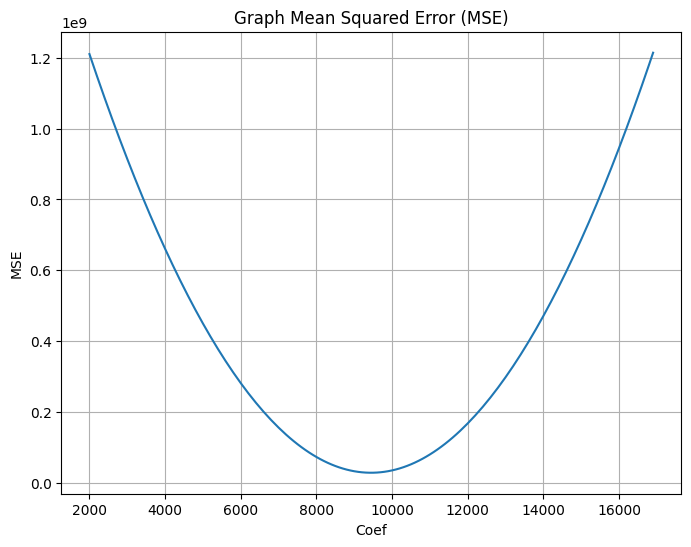

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(list(mse_values.keys()),list(mse_values.values()))
plt.xlabel('Coef')
plt.ylabel('MSE')
plt.title('Graph Mean Squared Error (MSE)')
plt.grid(True)

# Afficher le graphique
plt.show()

# Algorythmes de minimisation

$ \LARGE a_1 = a_0 - \alpha \frac{\partial Y}{\partial a} $


 $\LARGE b_1 = b_0 - \alpha \frac{\partial Y}{\partial b} $

In [11]:
alpha = 0.015
epochs = 5000
a = 8000
b = 20000
dict_loss = {}
for epoch in range(epochs):
    y_pred = a * X + b
    
    dy_da = -2 * np.mean(x * (Y - y_pred))  
    dy_db = -2 * np.mean(Y - y_pred) 
    
    a = a - alpha * dy_da
    b = b - alpha * dy_db
    
    loss = mse_loss(y, y_pred)
    if epoch % 20 == 0:
        alpha = alpha*0.99
        dict_loss[epoch]=[a,b]
        print(f'Test {epoch}: MSE Loss = {loss:.4f}, a = {a:.2f}, b = {b:.2f}')

Test 0: MSE Loss = 1919811860.9195, a = 10573.87, b = 20380.92
Test 20: MSE Loss = 1196829538.2680, a = 10042.96, b = 20829.00
Test 40: MSE Loss = 1196543071.6936, a = 9975.51, b = 21280.26
Test 60: MSE Loss = 1196325711.9922, a = 9915.80, b = 21679.68
Test 80: MSE Loss = 1196161507.0657, a = 9862.90, b = 22033.61
Test 100: MSE Loss = 1196038173.7604, a = 9815.97, b = 22347.57
Test 120: MSE Loss = 1195946244.6085, a = 9774.29, b = 22626.39
Test 140: MSE Loss = 1195878416.3909, a = 9737.23, b = 22874.27
Test 160: MSE Loss = 1195829051.8642, a = 9704.26, b = 23094.88
Test 180: MSE Loss = 1195793797.9554, a = 9674.88, b = 23291.43
Test 200: MSE Loss = 1195769292.6973, a = 9648.67, b = 23466.73
Test 220: MSE Loss = 1195752939.9078, a = 9625.28, b = 23623.24
Test 240: MSE Loss = 1195742735.6783, a = 9604.37, b = 23763.12
Test 260: MSE Loss = 1195737134.5598, a = 9585.66, b = 23888.27
Test 280: MSE Loss = 1195734946.2190, a = 9568.91, b = 24000.35
Test 300: MSE Loss = 1195735255.5203, a = 95

Test 2700: MSE Loss = 1195847984.9404, a = 9409.27, b = 25068.26
Test 2720: MSE Loss = 1195847991.4590, a = 9409.27, b = 25068.29
Test 2740: MSE Loss = 1195847997.7277, a = 9409.27, b = 25068.32
Test 2760: MSE Loss = 1195848003.7577, a = 9409.26, b = 25068.35
Test 2780: MSE Loss = 1195848009.5598, a = 9409.26, b = 25068.37
Test 2800: MSE Loss = 1195848015.1443, a = 9409.25, b = 25068.40
Test 2820: MSE Loss = 1195848020.5207, a = 9409.25, b = 25068.42
Test 2840: MSE Loss = 1195848025.6983, a = 9409.25, b = 25068.45
Test 2860: MSE Loss = 1195848030.6857, a = 9409.24, b = 25068.47
Test 2880: MSE Loss = 1195848035.4914, a = 9409.24, b = 25068.49
Test 2900: MSE Loss = 1195848040.1232, a = 9409.24, b = 25068.51
Test 2920: MSE Loss = 1195848044.5885, a = 9409.23, b = 25068.53
Test 2940: MSE Loss = 1195848048.8945, a = 9409.23, b = 25068.55
Test 2960: MSE Loss = 1195848053.0480, a = 9409.23, b = 25068.57
Test 2980: MSE Loss = 1195848057.0554, a = 9409.23, b = 25068.59
Test 3000: MSE Loss = 119

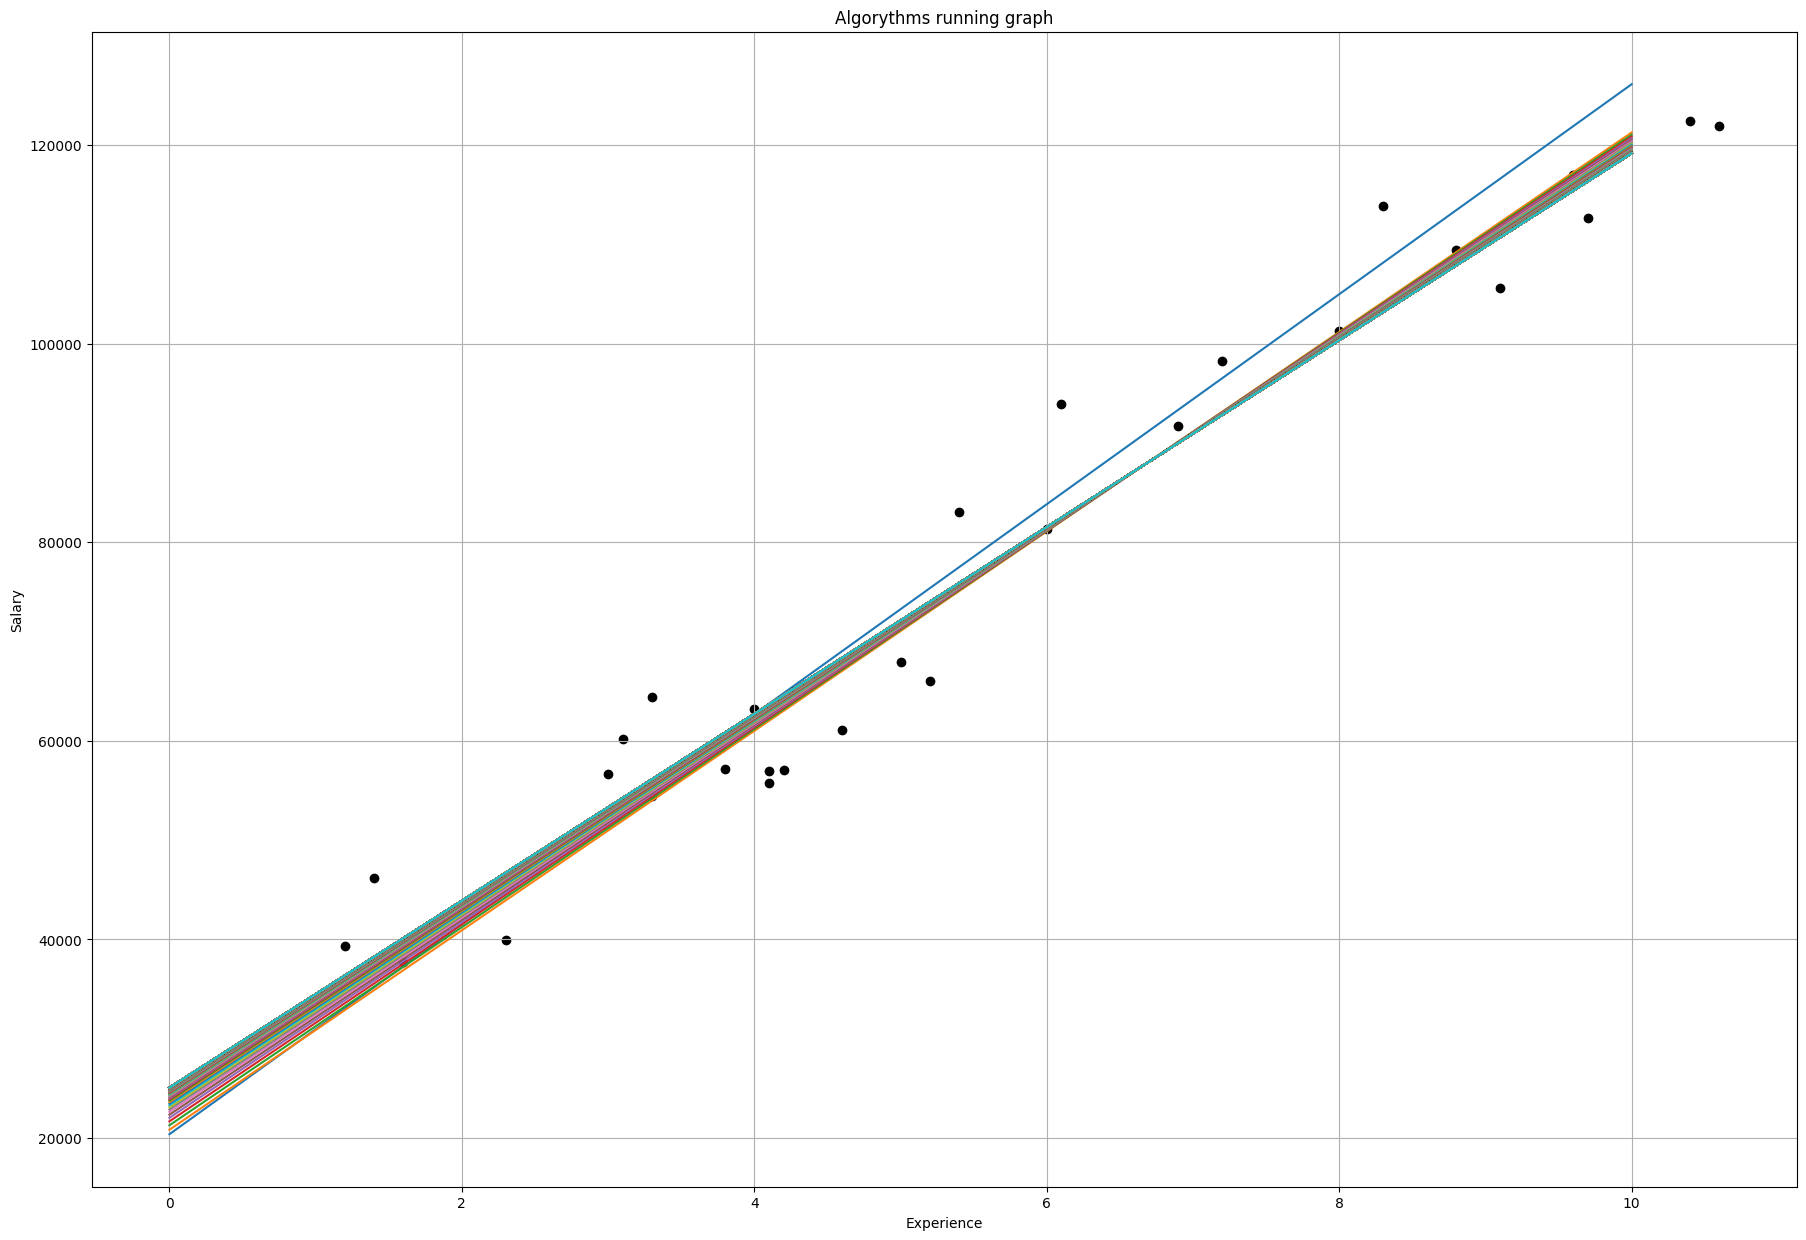

In [12]:
plt.figure(figsize=(22,15))
plt.scatter(x = X , y = Y, color='black')
x1 = np.linspace(0, 10, 100)  


for key, values in dict_loss.items():
    a, b = values  
    y1 = a * x1 + b  
    
    plt.plot(x1, y1, label=f'a={a:.2f}, b={b:.2f}')


plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Algorythms running graph')
plt.grid(True) 
plt.show()

In [13]:
final_index = max(dict_loss.keys())

In [14]:
a_f = dict_loss[final_index][0]
b_f = dict_loss[final_index][1]

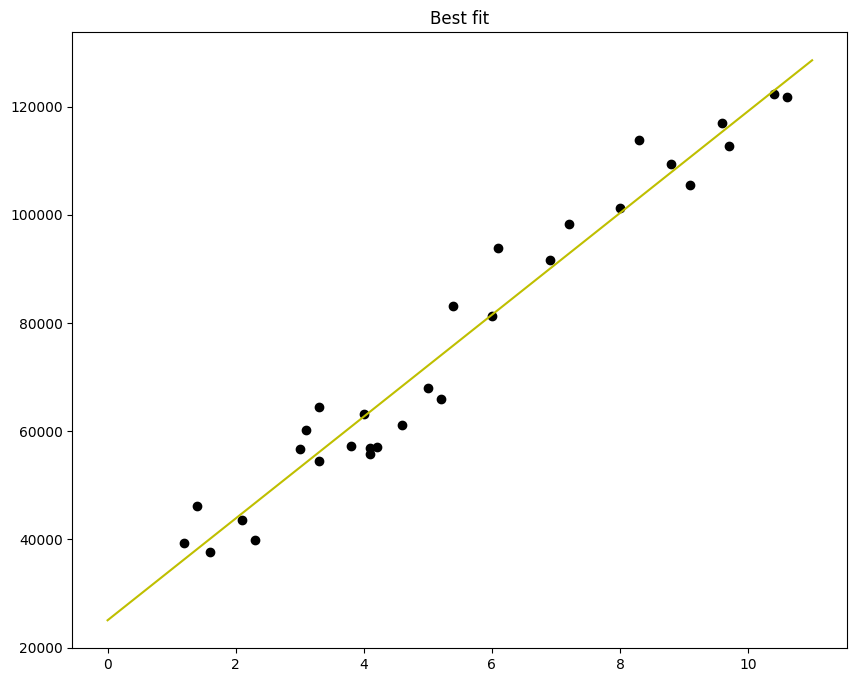

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(x = X , y = Y, color='black')
x2 = np.linspace(0, 11, 30)
y2 = a_f * x2 + b_f
plt.plot(x2, y2, color= 'y')
plt.title('Best fit')
plt.show()

# Generalisation et modèle à plusieurs variables - Matrices

$ \LARGE F=X^*\theta $

$ \LARGE
X = \begin{bmatrix}
x^{(1)}_1 & x^{(1)}_2 & 1 \\
x^{(2)}_1 & x^{(2)}_2 & 1 \\
\vdots & \vdots & \vdots \\
x^{(n)}_1 & x^{(n)}_2 & 1 \\
\end{bmatrix}
\quad
\theta = \begin{bmatrix} 
a \\
b \\
c \\
\end{bmatrix}
 $ 

In [16]:
x, y = make_regression (n_samples = 200, n_features = 2, noise = 20)

In [17]:
X = np.hstack((x, np.ones((x.shape[0],1))))

In [18]:
theta = np.array([[0.25],[0.65],[0.10]])

In [19]:
def model (X,theta): 
    return X@theta

In [20]:
Y = model(X,theta)

In [21]:
def gradient(X, y , theta): 
    m = len(y)
    return 1/m * X.T.dot(model(X,theta) - y)

In [22]:
def gradient_descent(X, y, theta, n_iter , learning_r): 
    cost_history = {}
    for i in range(n_iter): 
        theta = theta - learning_r * gradient(X, y , theta)
        loss = mse_loss(model(X,theta), y)
        if i % 15000 == 0:
            learning_r = learning_r*0.99
            cost_history[i] = [loss]
            print(f'Test {i}: MSE Loss = {loss:.2f}')
    return theta, cost_history 

In [23]:
n_iter = 1000
learning_r = 0.1

In [24]:
theta_trained, cost_history = gradient_descent(X,y,theta, n_iter, learning_r)

Test 0: MSE Loss = 88252.93


In [25]:
predict = model(X,theta_trained)

$ \LARGE R^2 = 1 - \frac{\sum (y - f(x))^2}{\sum (y - \bar{y})^2} $

In [26]:
def r2 (pred , y): 
    u = np.sum((y - pred)**2)
    v = np.sum((y-y.mean())**2)
    return 1 - u/v

In [27]:
r2(predict, y)

1.0

# Final 

In [28]:
data = pd.read_csv('data/housing.csv')

In [29]:
data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

In [30]:
imputer = SimpleImputer(strategy='mean')
data[['total_bedrooms']] = imputer.fit_transform(data[['total_bedrooms']])

In [31]:
x = data.drop(columns=['median_house_value', 'ocean_proximity'])
y = data[['median_house_value']]

In [32]:
temp = data['ocean_proximity'].unique()
OE= OneHotEncoder(sparse=False)
OE.fit(data[['ocean_proximity']]) 
data[temp] = OE.transform(data[['ocean_proximity']])
data.drop(columns=['ocean_proximity'], inplace= True)

/home/chinzi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [33]:
scaler = MinMaxScaler()
numeric_features_scaled = scaler.fit_transform(x)

In [34]:
ocean_proximity_encoded = data[temp]

In [35]:
x = np.hstack((numeric_features_scaled, ocean_proximity_encoded))

In [36]:
X = np.hstack((x, np.ones((x.shape[0],1))))

In [37]:
y = np.array(y)

In [38]:
X

array([[0.21115538, 0.5674814 , 0.78431373, ..., 1.        , 0.        ,
        1.        ],
       [0.21215139, 0.565356  , 0.39215686, ..., 1.        , 0.        ,
        1.        ],
       [0.21015936, 0.5642933 , 1.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.        , 0.        ,
        1.        ],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.        , 0.        ,
        1.        ]])

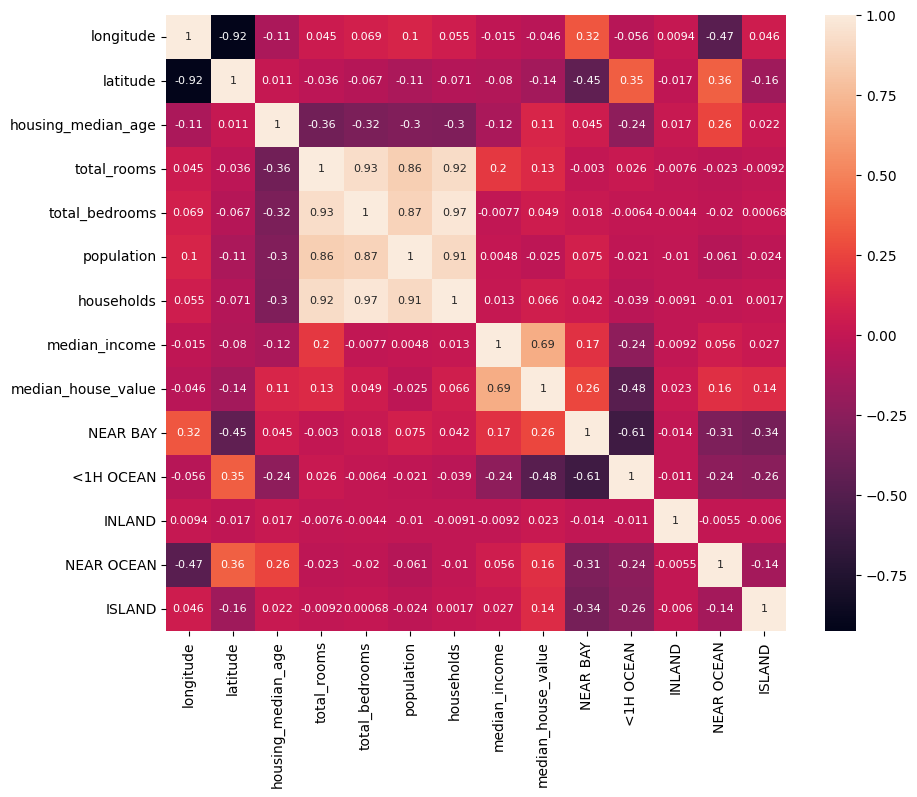

In [39]:
corr = data.corr()
plt.figure(figsize=(10, 8))
sn.heatmap(data=corr, annot = True,annot_kws={"size": 8})
plt.show()

In [40]:
theta = np.random.random((X.shape[1],1))

In [41]:
loss = mse_loss(model(X,theta), y)

In [42]:
n_iter = 100000
learning_r = 0.1

In [43]:
%time theta_trained, cost_history = gradient_descent(X,y,theta, n_iter, learning_r)

Test 0: MSE Loss = 20081406121.53
Test 15000: MSE Loss = 2493985124.42
Test 30000: MSE Loss = 2435596658.08
Test 45000: MSE Loss = 2404356515.87
Test 60000: MSE Loss = 2386715581.60
Test 75000: MSE Loss = 2376560700.29
Test 90000: MSE Loss = 2370611271.43
CPU times: user 1min 15s, sys: 1min 49s, total: 3min 4s
Wall time: 23.6 s


In [44]:
predict = model(X,theta_trained)

In [45]:
predict.shape

(20640, 1)

In [46]:
r2(predict, y)

0.6443164310543612

In [47]:
y.shape

(20640, 1)

# SGDRegressor Scikit-Learn

In [48]:
sgd_reg = SGDRegressor(loss='squared_error', max_iter = 100000, alpha=0.001)


In [49]:
%time  sgd_reg.fit(x,y)

/home/chinzi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 369 ms, sys: 0 ns, total: 369 ms
Wall time: 367 ms


SGDRegressor(alpha=0.001, max_iter=100000)

In [50]:
y_pred = sgd_reg.predict(x)

In [51]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [52]:
r2

0.615020632255997